# Three Wave Mixing Animation Under Constant Interaction
### James Saslow
### 6/25/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# Animation
from IPython.display import HTML
from math import floor
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:
# Defining Functions

# Differential Equation Solver - Runge-Kutta 4th Order Routine

# ODE is 1st Order
def f1(r,t):
    A0_func = r[0]
    A1_func = r[1]
    A2_func = r[2]
     
    # Velocities - 3WM differential equations
    f1 = -0.5*I*g(t)*w0*A1_func*A2_func
    f2 = -0.5*I*g(t)*w1*A0_func*np.conjugate(A2_func)
    f3 = -0.5*I*g(t)*w2*A0_func*np.conjugate(A1_func)
    
    return np.array([f1,f2,f3])
    
    
    
def RK4(f,t,init):
    length = len(t)
    dt = t[1] - t[0]
    r = [init]
    for i in range(length-1):
        k1 = dt * f(r[i],t[i])
        k2 = dt * f(r[i] + 0.5*k1, t[i] + 0.5*dt)
        k3 = dt * f(r[i] + 0.5*k2, t[i] + 0.5*dt)
        k4 = dt * f(r[i] + k3, t[i] + dt)
        r.append(r[i] + (1/6) * (k1 + 2*k2 + 2*k3 + k4))
    return np.transpose(r)

In [3]:

# Plots a shaded circle with a gamma symbol inside
r_circ_gamma = 0.20
def make_gamma():
    
    # Parameters describing the geometry of the circle coupling node
    phi = np.linspace(0,2*np.pi,100)
    x = r_circ_gamma*np.cos(phi)
    y = r_circ_gamma*np.sin(phi)
    
    plt.plot(x,y, color = 'black') # Border Color
    
    # Adjust the color of gamma in the animation to represent coupling strength
    plt.fill_between(x,y ,color = 'gray', alpha = 1) # Shading the region inside the circle with some color
    ax.text(-0.10, -0.07, r'$\gamma$', fontsize=35) # Fitting gamma label inside the circle
    

In [4]:
# Code Parameters

I = (-1)**0.5 # Imaginary Unit

# w0 - excited atom
# w1 - lower state atom
# w2 - photon

# Angular Frequencies
w1 = 7
w2 = 5
w0 = w1+w2
w = np.array([w0,w1,w2])

if w1<=w2:
    raise ValueError('Error: w1>w2 condition not met ')

    
# Number of initial quanta in each mode
n0_i = 1.5
n1_i = 0.5 
n2_i = 0.5
n_i = np.array([n0_i,n1_i,n2_i]) # array of initial quanta


#Time
t0 = 0   # Initial Time
tf = 2390*3*2*2 # Final time
num  = 4000*3*2*2*2# Number of time steps
t = np.linspace(t0,tf,num)
dt = t[1]-t[0]


# Gamma
cs = 4.1*(0.00047)/2# Coupling Strength
# a = 0.053
def g(t):
    return cs


# Initial Phases
theta0_i = 0 #+1
theta1_i = np.pi +1
theta2_i = np.pi/2 + 1

theta_i = np.array([theta0_i,theta1_i,theta2_i]) #array of initial phases



print('gamma = ', cs)
print('w0,w1,w2 = ',w0,w1,w2)
print('dt = ',dt)

gamma =  0.0009634999999999998
w0,w1,w2 =  12 7 5
dt =  0.29875311201158344


In [5]:
init =  n_i*np.exp(I*theta_i)
run = RK4(f1,t,init)
A0,A1,A2 = run

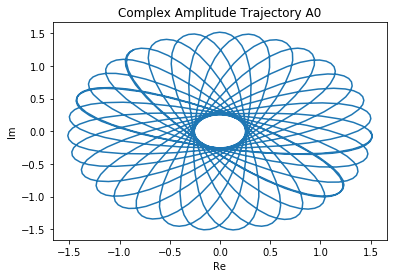

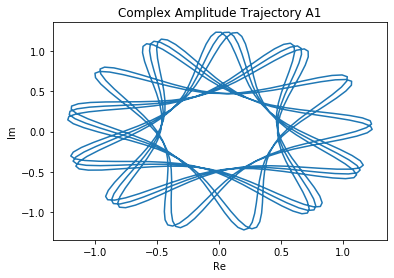

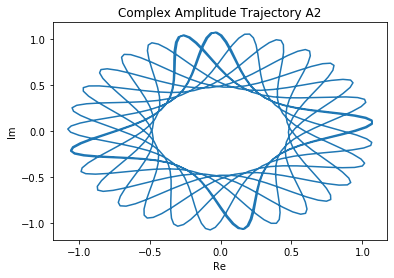

In [11]:
# Plotting trajectories in Complex Amplitude Space

plt.title('Complex Amplitude Trajectory A0')
plt.plot(np.real(A0), np.imag(A0))
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

plt.title('Complex Amplitude Trajectory A1')
plt.plot(np.real(A1), np.imag(A1))
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()


plt.title('Complex Amplitude Trajectory A2')
plt.plot(np.real(A2), np.imag(A2))
plt.xlabel('Re')
plt.ylabel('Im')
plt.show()

In [8]:
# Skipping time steps to load animation faster
skip = 75*2

A0 = A0[::skip]
A1 = A1[::skip]
A2 = A2[::skip]

t = t[::skip]

In [9]:
plt.rcParams['animation.embed_limit'] = 100 # Larger animation size

fig = plt.figure(figsize=(8.5,7.5))
line0, = plt.plot([], "b")
line1, = plt.plot([], "orange")
line2, = plt.plot([], "g")

spring0, = plt.plot([], "b")
spring1, = plt.plot([], "orange")
spring2, = plt.plot([], "g")

path0, = plt.plot([], "b", alpha = 0.3, linestyle = '-')
path1, = plt.plot([], "orange", alpha = 0.3, linestyle = '-')
path2, = plt.plot([], "g", alpha = 0.3, linestyle = '-')

ax = plt.gca()


plt.title('Amplitude Plot', size = 24)
plt.xlabel('$Re$', size = 22)
plt.ylabel('$Im$', size = 22)
plt.xlim(-2,2)
plt.ylim(-2,2)

make_gamma()
circle = plt.Circle((0, 0), r_circ_gamma, color='gray', alpha=1)
ax.add_artist(circle)

plt.close()


def animate(frame):
    
    def A_point(frame, mode):
        if mode==0:
            A = A0
        if mode == 1:
            A = A1
        if mode == 2:
            A = A2
        x,y = np.real(A)[frame], np.imag(A)[frame]
        global r_circ
        r_circ = 0.1
        phi = np.linspace(0,2*np.pi,14)
        x_circ = x + r_circ*np.cos(phi)
        y_circ = y + r_circ*np.sin(phi)
        return x_circ, y_circ
    
    def A_path(frame, mode):
        if mode == 0:
            A = A0
        if mode == 1:
            A = A1
        if mode == 2:
            A = A2
        x,y = np.real(A)[:frame], np.imag(A)[:frame]
        
        return x,y 
    
    
    def spring(frame, mode):
        if mode == 0:
            A = A0
        if mode == 1:
            A = A1
        if mode == 2:
            A = A2
        
        x,y = np.real(A)[frame], np.imag(A)[frame]
        L = np.sqrt(x**2+y**2)-r_circ-r_circ_gamma
        k = 50/ L
        x_sin = np.linspace(r_circ_gamma, np.sqrt(x**2+y**2)-r_circ, 200)
        y_sin = 0.03*np.sin(k*x_sin)
        angle = np.arctan2(y,x)
        x_sin_rot = x_sin*np.cos(angle) - y_sin*np.sin(angle)
        y_sin_rot = x_sin*np.sin(angle) + y_sin*np.cos(angle)
        return x_sin_rot, y_sin_rot
    
    
    x0,y0 = A_point(frame, 0)
    x1,y1 = A_point(frame, 1)
    x2,y2 = A_point(frame, 2)
    
    
    x0_spring, y0_spring = spring(frame, 0)
    x1_spring, y1_spring = spring(frame, 1)
    x2_spring, y2_spring = spring(frame, 2)
    
    
    line0.set_data(x0 , y0)
    line1.set_data(x1 , y1)
    line2.set_data(x2 , y2)
    
    spring0.set_data(x0_spring , y0_spring)
    spring1.set_data(x1_spring , y1_spring)
    spring2.set_data(x2_spring , y2_spring)
    
    x0_path, y0_path = A_path(frame,0)
    x1_path, y1_path = A_path(frame,1)
    x2_path, y2_path = A_path(frame,2)
    
    path0.set_data(x0_path, y0_path)
    path1.set_data(x1_path, y1_path)
    path2.set_data(x2_path, y2_path)

    
    ax.text(0.89, 0.95,'time: '+ str("{:.2f}".format(t[frame] )), 
        bbox={'facecolor': 'red', 'pad': 5},
        transform=ax.transAxes, ha="center")
    
anim = FuncAnimation(fig,animate, frames = len(t), interval = 60)

HTML(anim.to_jshtml())


# Note for future work: impliment boundary conditions on the springs to make them look nicer

KeyboardInterrupt: 

In [ ]:
#Saving the animation to the Classical Laser Revamped Folder

gif_writer = animation.ImageMagickWriter(fps=17)
anim.save('const_gamma_animation.gif', writer=gif_writer)